# Lab 7

In [24]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import Axes3D
import scipy
from scipy import stats
from scipy.stats import poisson
import pickle
import h5py
import math
import pandas

infile = open ("higgs_100000_pt_250_500.pkl",'rb')
higgs = pickle.load(infile)

infile = open ("qcd_100000_pt_250_500.pkl", 'rb')
qcd = pickle.load(infile)

higgs.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

## Problem 1

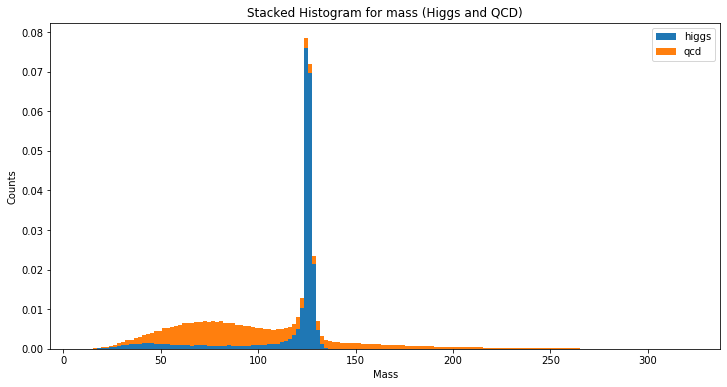

In [119]:
#create stacked histogram
#weight each histogram by its weight

mass_higgs = higgs['mass']
mass_qcd = qcd['mass']

plt.rcParams["figure.figsize"] = (12,6)
mass_plot = plt.hist([mass_higgs, mass_qcd], bins=150, 
                     stacked=True, density=True, histtype='barstacked',
                     label=['higgs', 'qcd'])
plt.title('Stacked Histogram for mass (Higgs and QCD)')
plt.ylabel('Counts')
plt.xlabel('Mass')
plt.legend()

The expected significance, without any event selection, will calculated below. The expected yields for the datasets will be taken account for, where NHiggs=100 and NQCD=20000

In [120]:
mu = 20000
stdev = stats.poisson.std(mu)
sig = 100/stdev
print(sig)
print(100 / math.sqrt(20000))

0.7071067811865475
0.7071067811865475


The expected significance is less than 1-sigma. The value of NHiggs/sqrt(NQCD) is equivalent to the value outputed using poisson statistics to find the expected significance.

## Problem 2
Now we will apply different mass cuts to both datasets, in order to optimize the expected significance. The greater the value, the better. After each mass cuts are done, the expected significance will be calculated to see how effective the cuts are.

The first cuts will be done at mass=100 & 150:

In [121]:
#cut1
cut1_masshiggs = [x for x in mass_higgs if x > 100 and x < 150]
cut1_massqcd = [x for x in mass_qcd if x > 100 and x < 150]

n1_higgs = len(cut1_masshiggs)/len(mass_higgs)*100
n1_qcd = len(cut1_massqcd)/len(mass_qcd)*20000

sig1 = n1_higgs / math.sqrt(n1_qcd)
print(f"Significance is {sig1} sigma")

Significance is 1.180160975626716 sigma


This time, cuts at 120 and 140 will be done:

In [122]:
#cut2
cut2_masshiggs = [x for x in mass_higgs if x > 120 and x < 140]
cut2_massqcd = [x for x in mass_qcd if x > 120 and x < 140]

n2_higgs = len(cut2_masshiggs)/len(mass_higgs)*100
n2_qcd = len(cut2_massqcd)/len(mass_qcd)*20000

sig2 = n2_higgs / math.sqrt(n2_qcd)
print(f"Significance is {sig2} sigma, which is greater than the above.")

1758.0000000000002
Significance is 1.8618119009737553 sigma, which is greater than the above.


Now we will try cuts at 124 and 127:

3.127862716779168
Significance is 3.127862716779168 sigma


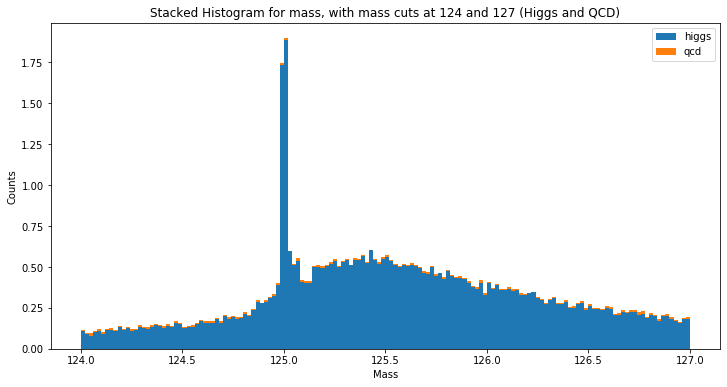

In [124]:
#cut3 (greatest significance, 2.87 sigma)
cut3_masshiggs = [x for x in mass_higgs if x > 124 and x < 127]
cut3_massqcd = [x for x in mass_qcd if x > 124 and x < 127]

n3_higgs = len(cut3_masshiggs)/len(mass_higgs)*100
n3_qcd = len(cut3_massqcd)/len(mass_qcd)*20000

print(n3_higgs / math.sqrt(n3_qcd))
print(f"Significance is {sig3} sigma")

finalplot_mass = plt.hist([cut3_masshiggs, cut3_massqcd], bins=150, 
                     stacked=True, density=True, histtype='barstacked',
                     label=['higgs', 'qcd'])
plt.title('Stacked Histogram for mass, with mass cuts at 124 and 127 (Higgs and QCD)')
plt.ylabel('Counts')
plt.xlabel('Mass')
plt.legend()

The highest significance was 3.13 sigma with mass cuts at 124 and 127. From looking at the plot, we can tell that the SNR is much higher by seeing how little orange, the QCD data, shows on the histogram.

## Problem 3
### Set A
The rest of the features of the dataset will be plotted as a stacked histogram, without any event selection.

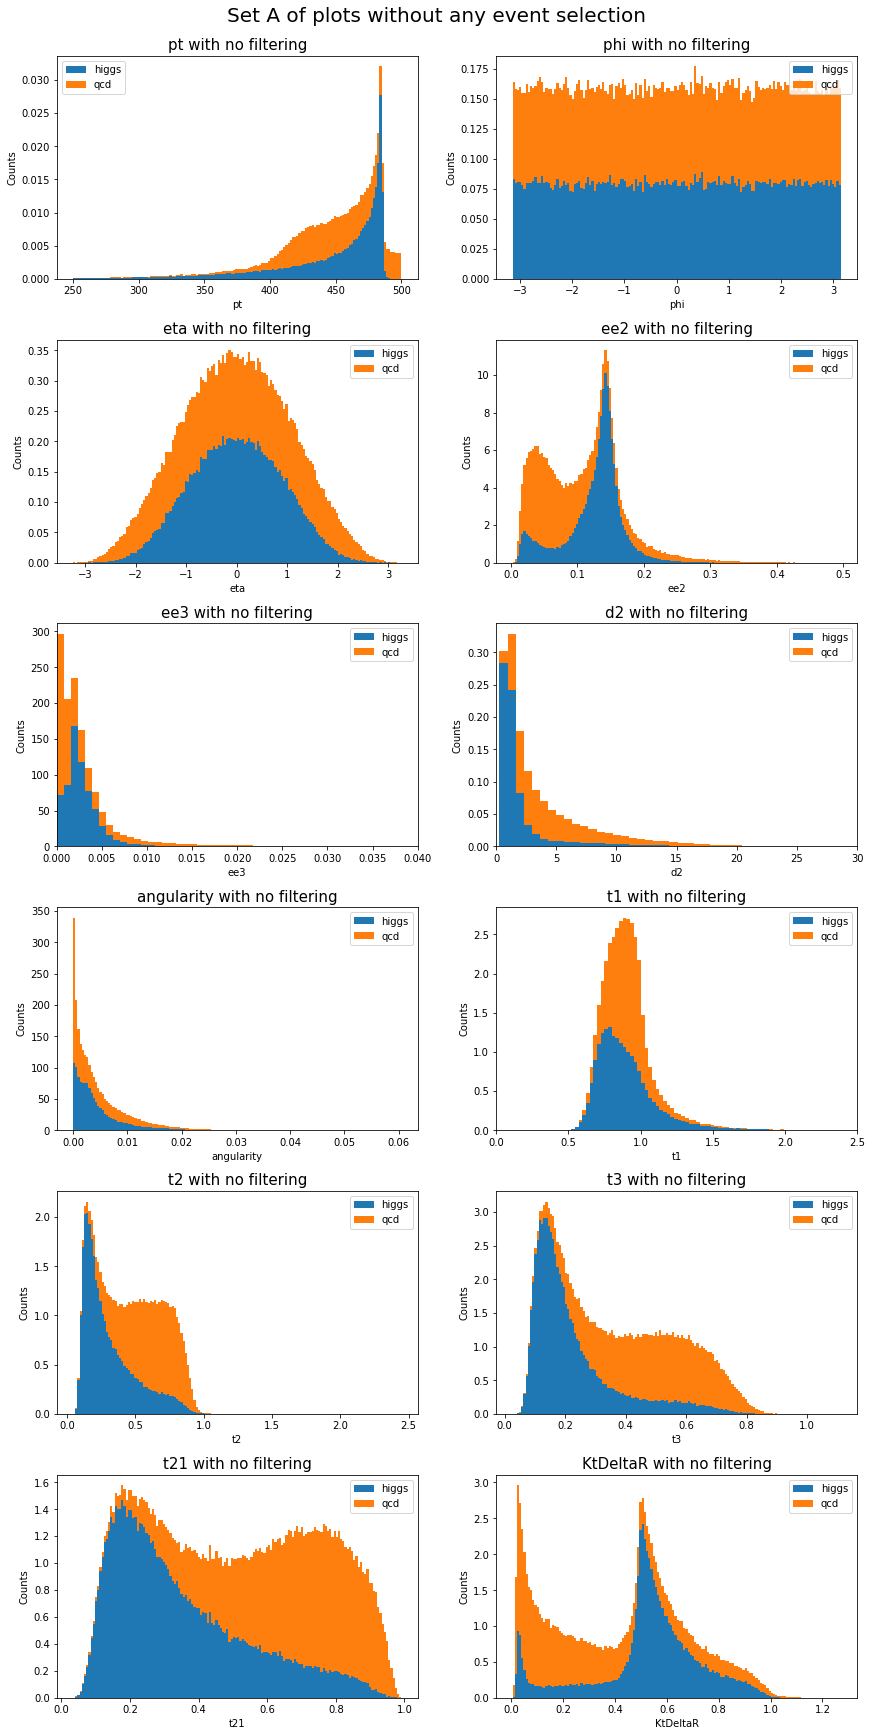

In [18]:
fig1, axes = plt.subplots(nrows=6, ncols=2, constrained_layout=True)
fig1.suptitle('Set A of plots without any event selection', fontsize=20)

higgs_pt = higgs['pt']
qcd_pt = qcd['pt']
plt.rcParams["figure.figsize"] = (12, 24)
pt_plot = axes[0,0].hist([higgs_pt, qcd_pt], bins=150, 
                     stacked=True, density=True, histtype='barstacked',
                     label=['higgs', 'qcd'])
axes[0,0].set_title('pt with no filtering', fontsize=15)
axes[0,0].set_ylabel('Counts')
axes[0,0].set_xlabel('pt')
axes[0,0].legend()


higgs_phi = higgs['phi']
qcd_phi = qcd['phi']
phi_plot = axes[0,1].hist([higgs_phi, qcd_phi], bins=150, 
                     stacked=True, density=True, histtype='barstacked',
                     label=['higgs', 'qcd'])
axes[0,1].set_title('phi with no filtering', fontsize=15)
axes[0,1].set_ylabel('Counts')
axes[0,1].set_xlabel('phi')
axes[0,1].legend()


higgs_eta = higgs['eta']
qcd_eta = qcd['eta']
eta_plot = axes[1,0].hist([higgs_eta, qcd_eta], bins=150, 
                     stacked=True, density=True, histtype='barstacked',
                     label=['higgs', 'qcd'])
axes[1,0].set_title('eta with no filtering', fontsize=15)
axes[1,0].set_ylabel('Counts')
axes[1,0].set_xlabel('eta')
axes[1,0].legend()


higgs_ee2 = higgs['ee2']
qcd_ee2 = qcd['ee2']
ee2_plot = axes[1,1].hist([higgs_ee2, qcd_ee2], bins=150, 
                     stacked=True, density=True, histtype='barstacked',
                     label=['higgs', 'qcd'])
axes[1,1].set_title('ee2 with no filtering', fontsize=15)
axes[1,1].set_ylabel('Counts')
axes[1,1].set_xlabel('ee2')
axes[1,1].legend()


higgs_ee3 = higgs['ee3']
qcd_ee3 = qcd['ee3']
ee3_plot = axes[2,0].hist([higgs_ee3, qcd_ee3], bins=150, 
                     stacked=True, density=True, histtype='barstacked',
                     label=['higgs', 'qcd'])
axes[2,0].set_title('ee3 with no filtering', fontsize=15)
axes[2,0].set_ylabel('Counts')
axes[2,0].set_xlabel('ee3')
axes[2,0].legend()
axes[2,0].set_xlim(0, 0.04)


higgs_d2 = higgs['d2']
qcd_d2 = qcd['d2']
d2_plot = axes[2,1].hist([higgs_d2, qcd_d2], bins=150, 
                     stacked=True, density=True, histtype='barstacked',
                     label=['higgs', 'qcd'])
axes[2,1].set_title('d2 with no filtering', fontsize=15)
axes[2,1].set_ylabel('Counts')
axes[2,1].set_xlabel('d2')
axes[2,1].legend()
axes[2,1].set_xlim(0, 30)


higgs_angularity = higgs['angularity']
qcd_angularity = qcd['angularity']
angularity_plot = axes[3,0].hist([higgs_angularity, qcd_angularity], bins=150, 
                     stacked=True, density=True, histtype='barstacked',
                     label=['higgs', 'qcd'])
axes[3,0].set_title('angularity with no filtering', fontsize=15)
axes[3,0].set_ylabel('Counts')
axes[3,0].set_xlabel('angularity')
axes[3,0].legend()


higgs_t1 = higgs['t1']
qcd_t1 = qcd['t1']
t1_plot = axes[3,1].hist([higgs_t1, qcd_t1], bins=150, 
                     stacked=True, density=True, histtype='barstacked',
                     label=['higgs', 'qcd'])
axes[3,1].set_title('t1 with no filtering', fontsize=15)
axes[3,1].set_ylabel('Counts')
axes[3,1].set_xlabel('t1')
axes[3,1].legend()
axes[3,1].set_xlim(0, 2.5)


higgs_t2 = higgs['t2']
qcd_t2 = qcd['t2']
t2_plot = axes[4,0].hist([higgs_t2, qcd_t2], bins=150, 
                     stacked=True, density=True, histtype='barstacked',
                     label=['higgs', 'qcd'])
axes[4,0].set_title('t2 with no filtering', fontsize=15)
axes[4,0].set_ylabel('Counts')
axes[4,0].set_xlabel('t2')
axes[4,0].legend()


higgs_t3 = higgs['t3']
qcd_t3 = qcd['t3']
t3_plot = axes[4,1].hist([higgs_t3, qcd_t3], bins=150, 
                     stacked=True, density=True, histtype='barstacked',
                     label=['higgs', 'qcd'])
axes[4,1].set_title('t3 with no filtering', fontsize=15)
axes[4,1].set_ylabel('Counts')
axes[4,1].set_xlabel('t3')
axes[4,1].legend()


higgs_t21 = higgs['t21']
qcd_t21 = qcd['t21']
t21_plot = axes[5,0].hist([higgs_t21, qcd_t21], bins=150, 
                     stacked=True, density=True, histtype='barstacked',
                     label=['higgs', 'qcd'])
axes[5,0].set_title('t21 with no filtering', fontsize=15)
axes[5,0].set_ylabel('Counts')
axes[5,0].set_xlabel('t21')
axes[5,0].legend()


higgs_KtDeltaR = higgs['KtDeltaR']
qcd_KtDeltaR = qcd['KtDeltaR']
KtDeltaR_plot = axes[5,1].hist([higgs_KtDeltaR, qcd_KtDeltaR], bins=150, 
                     stacked=True, density=True, histtype='barstacked',
                     label=['higgs', 'qcd'])
axes[5,1].set_title('KtDeltaR with no filtering', fontsize=15)
axes[5,1].set_ylabel('Counts')
axes[5,1].set_xlabel('KtDeltaR')
axes[5,1].legend()

By looking at the plots above, another feature as discriminative as mass seems to be t2. The higgs and QCD datasets do not seem to overlap each other around the peak of the higgs dataset.

### Set B
The optimal mass cuts found during problem 2 will be applied to the rest of the features, and will be plotted below.

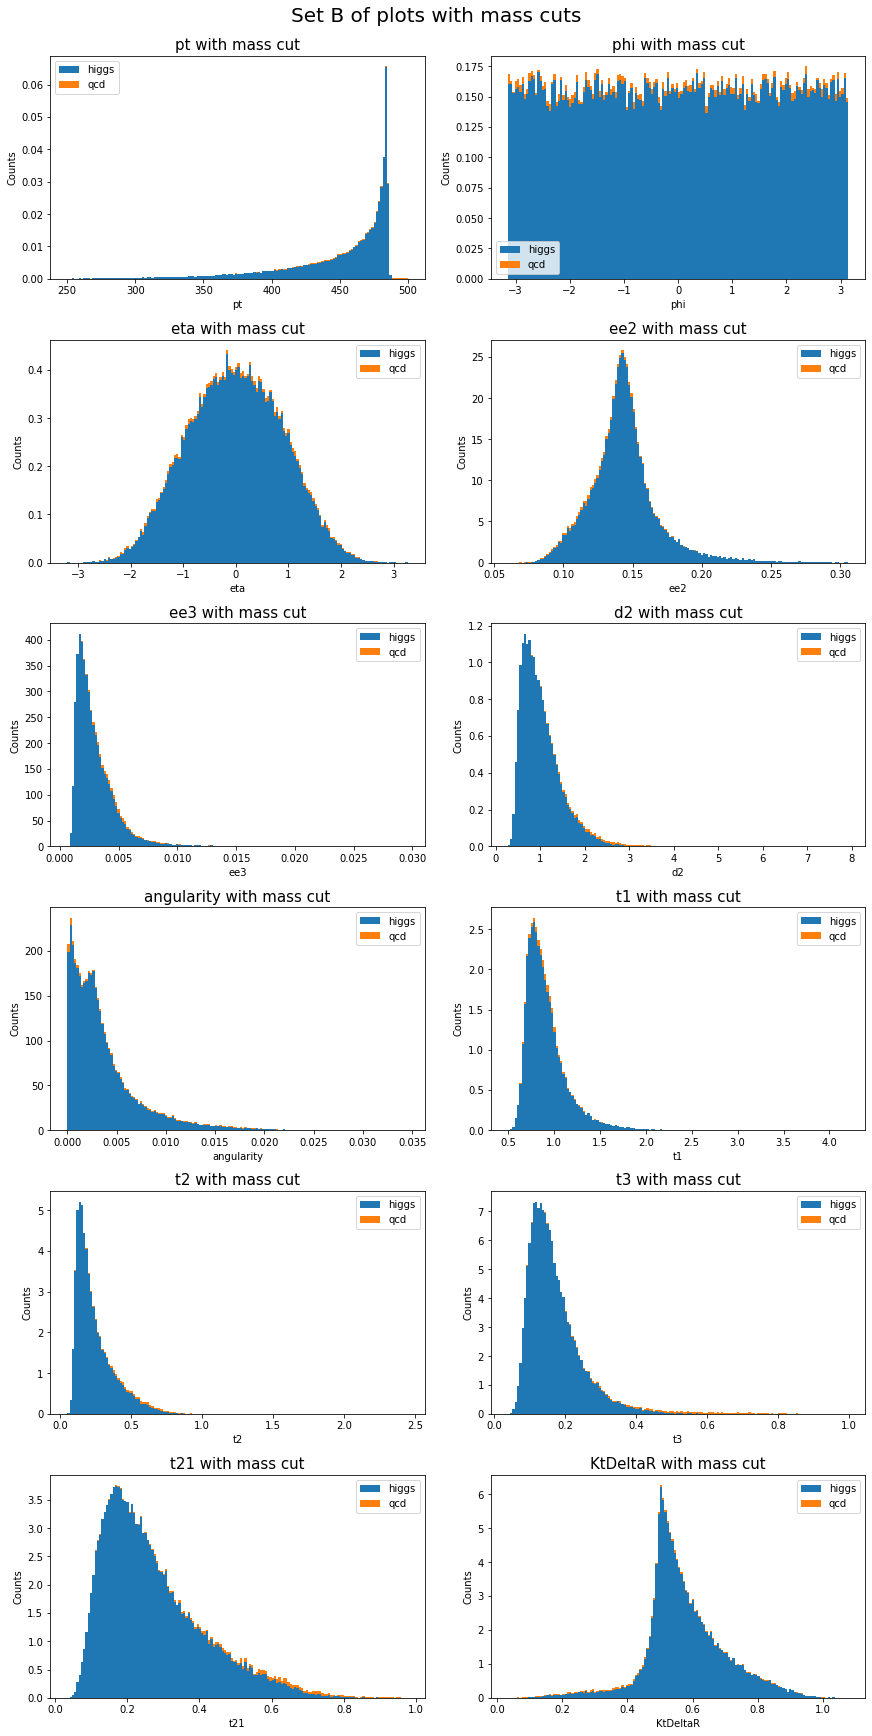

In [8]:
fig2, axes = plt.subplots(nrows=6, ncols=2, constrained_layout=True)
fig2.suptitle('Set B of plots with mass cuts', fontsize=20)
plt.rcParams["figure.figsize"] = (12, 24)

pt_higgs_mcut = higgs[higgs['mass'].isin(cut3_masshiggs)]['pt']
pt_qcd_mcut = qcd[qcd['mass'].isin(cut3_massqcd)]['pt']
finalplot_pt = axes[0,0].hist([pt_higgs_mcut, pt_qcd_mcut], bins=150, 
                     stacked=True, density=True, histtype='barstacked',
                     label=['higgs', 'qcd'])
axes[0,0].set_title('pt with mass cut', fontsize=15)
axes[0,0].set_ylabel('Counts')
axes[0,0].set_xlabel('pt')
axes[0,0].legend()


phi_higgs_mcut = higgs[higgs['mass'].isin(cut3_masshiggs)]['phi']
phi_qcd_mcut = qcd[qcd['mass'].isin(cut3_massqcd)]['phi']
finalplot_phi = axes[0,1].hist([phi_higgs_mcut, phi_qcd_mcut], bins=150, 
                     stacked=True, density=True, histtype='barstacked',
                     label=['higgs', 'qcd'])
axes[0,1].set_title('phi with mass cut', fontsize=15)
axes[0,1].set_ylabel('Counts')
axes[0,1].set_xlabel('phi')
axes[0,1].legend()


eta_higgs_mcut = higgs[higgs['mass'].isin(cut3_masshiggs)]['eta']
eta_qcd_mcut = qcd[qcd['mass'].isin(cut3_massqcd)]['eta']
finalplot_eta = axes[1,0].hist([eta_higgs_mcut, eta_qcd_mcut], bins=150, 
                     stacked=True, density=True, histtype='barstacked',
                     label=['higgs', 'qcd'])
axes[1,0].set_title('eta with mass cut', fontsize=15)
axes[1,0].set_ylabel('Counts')
axes[1,0].set_xlabel('eta')
axes[1,0].legend()


ee2_higgs_mcut = higgs[higgs['mass'].isin(cut3_masshiggs)]['ee2']
ee2_qcd_mcut = qcd[qcd['mass'].isin(cut3_massqcd)]['ee2']
finalplot_ee2 = axes[1,1].hist([ee2_higgs_mcut, ee2_qcd_mcut], bins=150, 
                     stacked=True, density=True, histtype='barstacked',
                     label=['higgs', 'qcd'])
axes[1,1].set_title('ee2 with mass cut', fontsize=15)
axes[1,1].set_ylabel('Counts')
axes[1,1].set_xlabel('ee2')
axes[1,1].legend()


ee3_higgs_mcut = higgs[higgs['mass'].isin(cut3_masshiggs)]['ee3']
ee3_qcd_mcut = qcd[qcd['mass'].isin(cut3_massqcd)]['ee3']
finalplot_ee3 = axes[2,0].hist([ee3_higgs_mcut, ee3_qcd_mcut], bins=150, 
                     stacked=True, density=True, histtype='barstacked',
                     label=['higgs', 'qcd'])
axes[2,0].set_title('ee3 with mass cut', fontsize=15)
axes[2,0].set_ylabel('Counts')
axes[2,0].set_xlabel('ee3')
axes[2,0].legend()


d2_higgs_mcut = higgs[higgs['mass'].isin(cut3_masshiggs)]['d2']
d2_qcd_mcut = qcd[qcd['mass'].isin(cut3_massqcd)]['d2']
finalplot_d2 = axes[2,1].hist([d2_higgs_mcut, d2_qcd_mcut], bins=150, 
                     stacked=True, density=True, histtype='barstacked',
                     label=['higgs', 'qcd'])
axes[2,1].set_title('d2 with mass cut', fontsize=15)
axes[2,1].set_ylabel('Counts')
axes[2,1].set_xlabel('d2')
axes[2,1].legend()


angularity_higgs_mcut = higgs[higgs['mass'].isin(cut3_masshiggs)]['angularity']
angularity_qcd_mcut = qcd[qcd['mass'].isin(cut3_massqcd)]['angularity']
finalplot_angularity = axes[3,0].hist([angularity_higgs_mcut, angularity_qcd_mcut], 
                            bins=150, stacked=True, density=True, 
                            histtype='barstacked', label=['higgs', 'qcd'])
axes[3,0].set_title('angularity with mass cut', fontsize=15)
axes[3,0].set_ylabel('Counts')
axes[3,0].set_xlabel('angularity')
axes[3,0].legend()


t1_higgs_mcut = higgs[higgs['mass'].isin(cut3_masshiggs)]['t1']
t1_qcd_mcut = qcd[qcd['mass'].isin(cut3_massqcd)]['t1']
finalplot_t1 = axes[3,1].hist([t1_higgs_mcut, t1_qcd_mcut], bins=150,
                  stacked=True, density=True, histtype='barstacked',
                  label=['higgs', 'qcd'])
axes[3,1].set_title('t1 with mass cut', fontsize=15)
axes[3,1].set_ylabel('Counts')
axes[3,1].set_xlabel('t1')
axes[3,1].legend()


t2_higgs_mcut = higgs[higgs['mass'].isin(cut3_masshiggs)]['t2']
t2_qcd_mcut = qcd[qcd['mass'].isin(cut3_massqcd)]['t2']
finalplot_t2 = axes[4,0].hist([t2_higgs_mcut, t2_qcd_mcut], bins=150,
                  stacked=True, density=True, histtype='barstacked',
                  label=['higgs', 'qcd'])
axes[4,0].set_title('t2 with mass cut', fontsize=15)
axes[4,0].set_ylabel('Counts')
axes[4,0].set_xlabel('t2')
axes[4,0].legend()


t3_higgs_mcut = higgs[higgs['mass'].isin(cut3_masshiggs)]['t3']
t3_qcd_mcut = qcd[qcd['mass'].isin(cut3_massqcd)]['t2']
finalplot_t3 = axes[4,1].hist([t3_higgs_mcut, t3_qcd_mcut], bins=150,
                  stacked=True, density=True, histtype='barstacked',
                  label=['higgs', 'qcd'])
axes[4,1].set_title('t3 with mass cut', fontsize=15)
axes[4,1].set_ylabel('Counts')
axes[4,1].set_xlabel('t3')
axes[4,1].legend()


t21_higgs_mcut = higgs[higgs['mass'].isin(cut3_masshiggs)]['t21']
t21_qcd_mcut = qcd[qcd['mass'].isin(cut3_massqcd)]['t21']
finalplot_t21 = axes[5,0].hist([t21_higgs_mcut, t21_qcd_mcut], bins=150,
                  stacked=True, density=True, histtype='barstacked',
                  label=['higgs', 'qcd'])
axes[5,0].set_title('t21 with mass cut', fontsize=15)
axes[5,0].set_ylabel('Counts')
axes[5,0].set_xlabel('t21')
axes[5,0].legend()


KtDeltaR_higgs_mcut = higgs[higgs['mass'].isin(cut3_masshiggs)]['KtDeltaR']
KtDeltaR_qcd_mcut = qcd[qcd['mass'].isin(cut3_massqcd)]['KtDeltaR']
finalplot_KtDeltaR = axes[5,1].hist([KtDeltaR_higgs_mcut, KtDeltaR_qcd_mcut], bins=150,
                  stacked=True, density=True, histtype='barstacked',
                  label=['higgs', 'qcd'])
axes[5,1].set_title('KtDeltaR with mass cut', fontsize=15)
axes[5,1].set_ylabel('Counts')
axes[5,1].set_xlabel('KtDeltaR')
axes[5,1].legend()

We can tell how our optimal mass cut was able to remove much of our background data for the other features as well, where there is significantly more Higgs data than QCD data.

## Problem 4
We were able to identify that feature cuts on the t2 data may potentially improve our significance even more. Below, optimal cuts on the t2 data has been made. However, the expected significance from just the t2 cuts is not as large from the optimal mass cuts.

436.79999999999995
Significance is 1.680545552473282 sigma


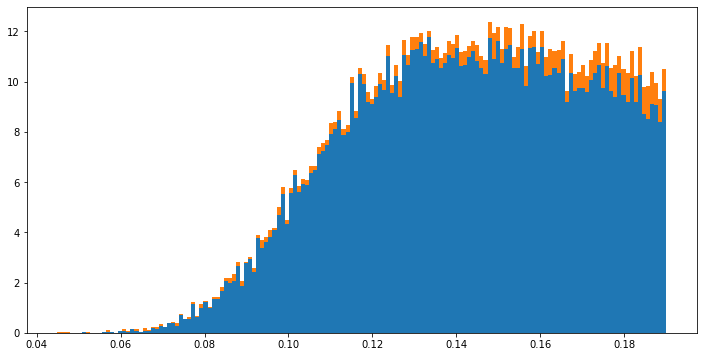

In [9]:
t2_higgs = higgs['t2']
t2_qcd = qcd['t2']

high = 0.19
cut_t2higgs = [x for x in t2_higgs if x < high]
cut_t2qcd = [x for x in t2_qcd if x < high]

n_higgs = len(cut_t2higgs)/len(t2_higgs)*100
n_qcd = len(cut_t2qcd)/len(t2_qcd)*20000
mu = n_qcd
print(mu)

stdev = stats.poisson.std(mu)
sig = n_higgs/stdev
print(f"Significance is {sig} sigma")

plt.rcParams["figure.figsize"] = (12,6)
finalplot_t2 = plt.hist([cut_t2higgs, cut_t2qcd], bins=150, 
                     stacked=True, density=True, histtype='barstacked',
                     label=['higgs', 'qcd'])

The t2 cuts made above will now be applied to the filtered datasets obtained from the mass cuts.

6.4
Significance is 9.745349179223902 sigma


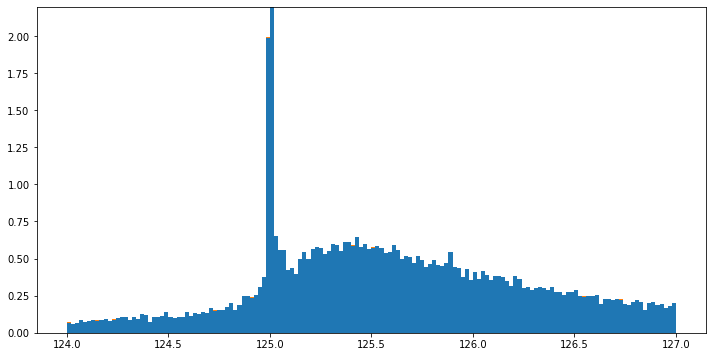

In [125]:
newHiggs = higgs[higgs['mass'].isin(cut3_masshiggs)]
mt2cut_higgs = newHiggs[newHiggs['t2'].isin(cut_t2higgs)]['mass']
newqcd = qcd[qcd['mass'].isin(cut3_massqcd)]
mt2cut_qcd = newqcd[newqcd['t2'].isin(cut_t2qcd)]['mass']

finalplot_mass = plt.hist([mt2cut_higgs, mt2cut_qcd], bins=150, 
                     stacked=True, density=True, histtype='barstacked',
                     label=['higgs', 'qcd'])

n_higgs = len(mt2cut_higgs)/len(mass_higgs)*100
n_qcd = len(mt2cut_qcd)/len(mass_qcd)*20000
mu = n_qcd
print(mu)

stdev = stats.poisson.std(mu)
sig = n_higgs/stdev
print(f"Significance is {sig} sigma")

# Lab 8
## Problem 1 (High luminosity data)

In [36]:
highLumi = pandas.read_hdf("data_highLumi_pt_250_500.h5")

(40344,)


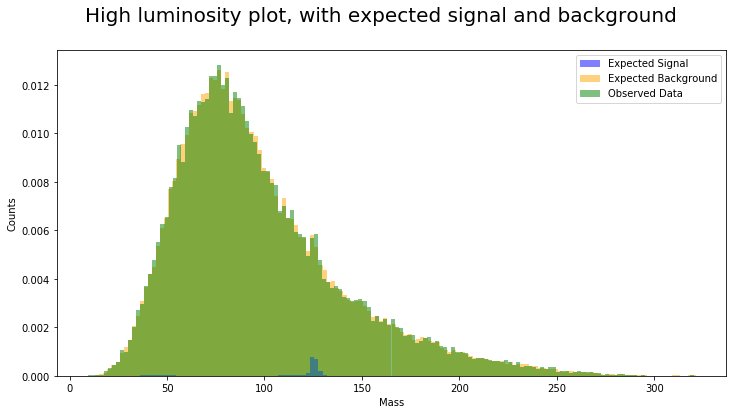

In [88]:
fig3, ax = plt.subplots(nrows=1, ncols=1)
#ax2 = ax1.twinx()
fig3.suptitle('High luminosity plot, with expected signal and background', fontsize=20)
plt.rcParams["figure.figsize"] = (12,6)
highLumi_mass = highLumi['mass']
print(highLumi_mass.shape)
hl_weight = np.empty(len(highLumi_mass))
hl_weight.fill(1)
qcd_weight = np.empty(len(mass_higgs))
qcd_weight.fill(200)
higgs_weight = np.empty(len(mass_higgs))
higgs_weight.fill(1)

bins=150
exp_plot = ax.hist([mass_higgs, mass_qcd], bins=150, stacked=True, density=True,
                   histtype='barstacked', weights=[higgs_weight, qcd_weight],
                   label=['Expected Signal', 'Expected Background'],
                   color=['blue', 'orange'], alpha=0.5)
obs_plot = ax.hist(highLumi_mass, bins=150, density=True, histtype='stepfilled',
                  label='Observed Data', color='green', alpha=0.5)
ax.set_ylabel('Counts')
ax.set_xlabel('Mass')
ax.legend()
plt.show()

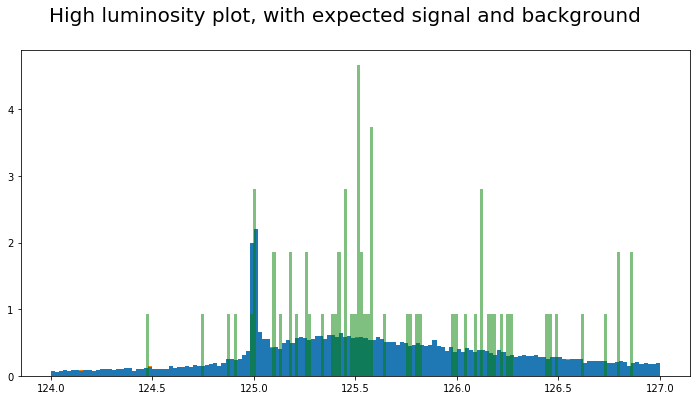

In [116]:
mcut_highLumi = [x for x in highLumi_mass if x > 124 and x < 127]

t2_highLumi = highLumi['t2']
high = 0.19
cut_t2highlumi = [x for x in t2_highLumi if x < high]

newHighLumi = highLumi[highLumi['mass'].isin(mcut_highLumi)]
mt2cut_HighLumi = newHighLum[newHighLum['t2'].isin(cut_t2highlumi)]['mass']

higgs_weight_mcut = np.empty(len(cut3_masshiggs))
higgs_weight_mcut.fill(n3_higgs/n3_qcd)
qcd_weight_mcut = np.empty(len(cut3_massqcd))
qcd_weight_mcut.fill(1)

fig4, ax1 = plt.subplots(nrows=1, ncols=1)
fig4.suptitle('High luminosity plot, with expected signal and background', fontsize=20)
mcut_exp_plot = plt.hist([mt2cut_higgs, mt2cut_qcd], bins=150, 
                     stacked=True, density=True, histtype='barstacked',
                     label=['higgs', 'qcd'])
mcut_obs_plot = plt.hist(mt2cut_HighLumi, bins=150, density=True, histtype='stepfilled',
                         label='Observed Data', color='green', alpha=0.5)

## Problem 2 (Low luminosity)

In [98]:
lowLumi = pandas.read_hdf("data_lowLumi_pt_250_500.h5")

(4060,)


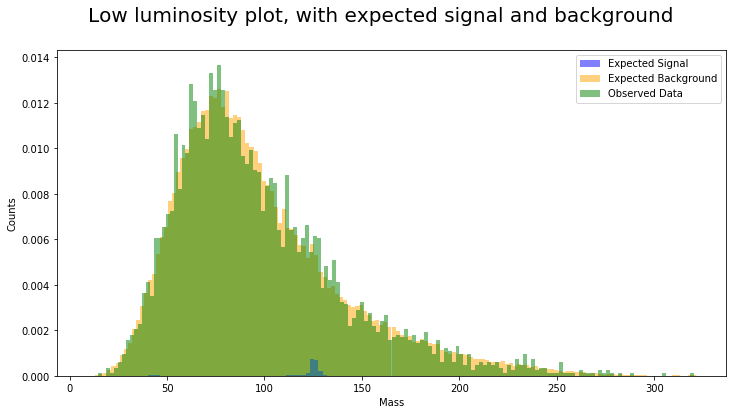

In [100]:
fig5, ax = plt.subplots(nrows=1, ncols=1)
fig5.suptitle('Low luminosity plot, with expected signal and background', fontsize=20)
plt.rcParams["figure.figsize"] = (12,6)
lowLumi_mass = lowLumi['mass']
print(lowLumi_mass.shape)
hl_weight = np.empty(len(lowLumi_mass))
hl_weight.fill(1)
qcd_weight = np.empty(len(mass_higgs))
qcd_weight.fill(200)
higgs_weight = np.empty(len(mass_higgs))
higgs_weight.fill(1)

bins=150
exp_plot = ax.hist([mass_higgs, mass_qcd], bins=150, stacked=True, density=True,
                   histtype='barstacked', weights=[higgs_weight, qcd_weight],
                   label=['Expected Signal', 'Expected Background'],
                   color=['blue', 'orange'], alpha=0.5)
obs_plot = ax.hist(lowLumi_mass, bins=150, density=True, histtype='stepfilled',
                  label='Observed Data', color='green', alpha=0.5)
ax.set_ylabel('Counts')
ax.set_xlabel('Mass')
ax.legend()
plt.show()

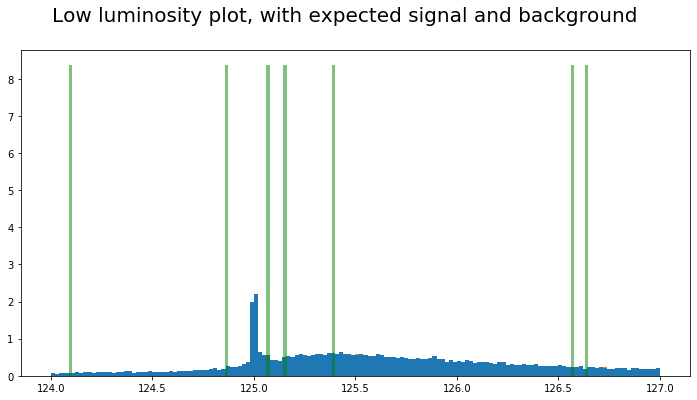

In [118]:
mcut_lowLumi = [x for x in lowLumi_mass if x > 124 and x < 127]

t2_lowLumi = lowLumi['t2']
high = 0.19
cut_t2lowLumi = [x for x in t2_lowLumi if x < high]

newlowLumi = lowLumi[lowLumi['mass'].isin(mcut_lowLumi)]
mt2cut_lowLumi = newlowLumi[newlowLumi['t2'].isin(cut_t2lowLumi)]['mass']

higgs_weight_mcut = np.empty(len(cut3_masshiggs))
higgs_weight_mcut.fill(n3_higgs/n3_qcd)
qcd_weight_mcut = np.empty(len(cut3_massqcd))
qcd_weight_mcut.fill(1)

fig4, ax1 = plt.subplots(nrows=1, ncols=1)
fig4.suptitle('Low luminosity plot, with expected signal and background', fontsize=20)
exp_plot = plt.hist([mt2cut_higgs, mt2cut_qcd], bins=150, 
                     stacked=True, density=True, histtype='barstacked',
                     label=['higgs', 'qcd'])
obs_plot = plt.hist(mt2cut_lowLumi, bins=150, density=True, histtype='stepfilled',
                         label='Observed Data', color='green', alpha=0.5)

In [105]:
newHiggs = higgs[higgs['mass'].isin(cut3_masshiggs)]